# Naive Bayes from Scratch

Naive Bayes is a probabilistic classification method based on Bayes' theorem. It assumes that features are conditionally independent given the class, which simplifies computation (this is why it's called **Naive** Bayes). For continuous data, the Gaussian variant models each feature using a normal distribution.

Pros: simple, fast, works well with small datasets, handles nonlinear boundaries

Cons: independence assumption rarely holds, can perform poorly when features are strongly correlated

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)

# Class 0: centered around (2, 2)
X0 = np.random.randn(50, 2) + np.array([2, 2])
y0 = np.zeros(50)

# Class 1: centered around (4, 4)
X1 = np.random.randn(50, 2) + np.array([4, 4])
y1 = np.ones(50)

# Combine them
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

We use $P(y=c|x)$. We dont need to calculate the exact value, it's enough that we know it's proportional to $P(x|y=c)P(y=c)$.

Naive Bayes assumes all features are independent given the class. This makes $P(x|y=c)=\prod_j P(x_j|y=c)$

We take the log to keep the compuation stable.

This leaves us with:

$\log P(y=c)+\sum_j \log P(x_j|y=c)$

Now, we estime the features probabilities with a Gaussian: (other common types are binary features with Bernoulli, features represent counts with multinomal)

$P(x_j|y=c)=\frac{1}{\sqrt(2\pi\sigma^2_{j,c})}\exp(-\frac{(x_j-\mu_{j,c})^2}{2\sigma^2_{j,c}})$

$\log P(x_j|y=c)=-\frac{1}{2}(2\pi\sigma_{j, c}^2+\frac{(x_j-\mu_{j,c})^2}{\sigma^2_{j,c}})$

In [ ]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)

        # store priors, means, variances
        self.priors = {}
        self.means = {}
        self.vars = {}

        for c in self.classes:
            # samples that belong in class c
            X_c = X[y == c]
            
            # P(y=c), just the ratio of the samples that belong to c
            self.priors[c] = len(X_c) / len(X)

            # the features' mean and variance
            self.means[c] = X_c.mean(axis=0)
            self.vars[c] = X_c.var(axis=0) + 1e-8

    # helper to calculate the sum of log probs of Gaussians
    def gaussian_log_prob(self, x, mean, var):
        return -0.5 * np.sum(np.log(2 * np.pi * var) + ((x - mean) ** 2) / var)

    def predict(self, X):
        
        preds = []
        for x in X:
            # a dictionary of probabilities that the sample belong to each class
            class_scores = {}
            for c in self.classes:
                # compute the log posterior for each test sample
                prior = np.log(self.priors[c])
                likelihood = self.gaussian_log_prob(x, self.means[c], self.vars[c])
                class_scores[c] = prior + likelihood
            
            # predict the class with the biggest posterior
            preds.append(max(class_scores, key=class_scores.get))
        
        return np.array(preds)

In [22]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


Visualizing the decision boundary (linear in my example but also handles non-linear)

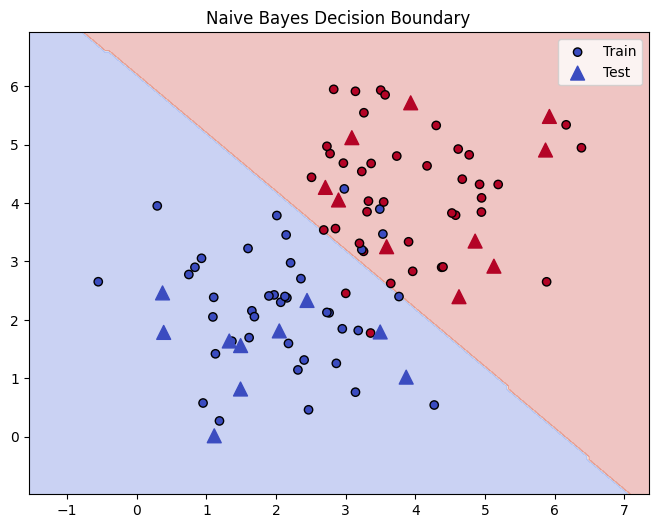

In [10]:
h = 0.05  # grid step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
clf = GaussianNaiveBayes()
clf.fit(X_train, y_train)
Z = clf.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='^', s=100, label='Test')
plt.title(f"Naive Bayes Decision Boundary")
plt.legend()
plt.show()

Here's how to use Gaussian Naive Bayes with the sklearn library:

In [24]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

1.0
